In [19]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Load the Dataset
data= pd.read_csv(r"C:\Users\Administrator\Downloads\archive (4)\clean_jobs.csv")
data.head()

,id,title,company,location,link,source,date_posted,work_type,employment_type,description
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...


In [7]:
#Data Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               327 non-null    int64  
 1   title            327 non-null    object 
 2   company          327 non-null    object 
 3   location         327 non-null    object 
 4   link             327 non-null    object 
 5   source           327 non-null    object 
 6   date_posted      327 non-null    object 
 7   work_type        0 non-null      float64
 8   employment_type  0 non-null      float64
 9   description      327 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 25.7+ KB


In [5]:
data.isna().sum()

id                   0
title                0
company              0
location             0
link                 0
source               0
date_posted          0
work_type          327
employment_type    327
description          0
dtype: int64

In [9]:
#Data Cleaning

# Drop columns that are completely null
data = data.drop(columns=['work_type', 'employment_type'])

In [10]:
# Convert date_posted to datetime
data['date_posted'] = pd.to_datetime(data['date_posted'], errors='coerce')

In [11]:
# Create a new feature for days since the job was posted
data['days_since_posted'] = (pd.Timestamp.today() - data['date_posted']).dt.days

data.head()

,id,title,company,location,link,source,date_posted,description,days_since_posted
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,32
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,32
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,32
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,32
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,About Pinterest\n\nMillions of people around t...,30


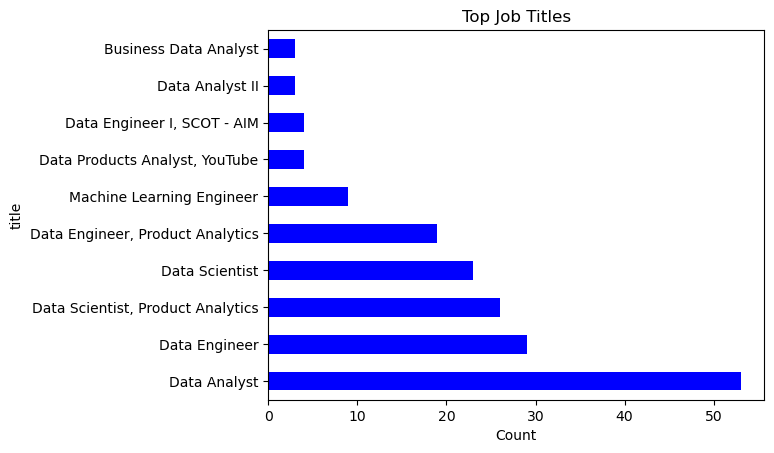

In [27]:
#EDA=Top Job Titles, Companies, and Locations

# Top Job Titles
data['title'].value_counts().head(10).plot(kind='barh', title='Top Job Titles', color='Blue')
plt.xlabel('Count')
plt.show()

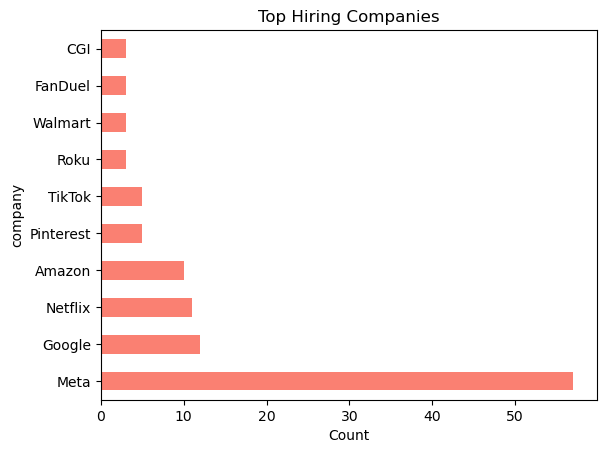

In [16]:
# Top Companies
data['company'].value_counts().head(10).plot(kind='barh', title='Top Hiring Companies', color='salmon')
plt.xlabel('Count')
plt.show()

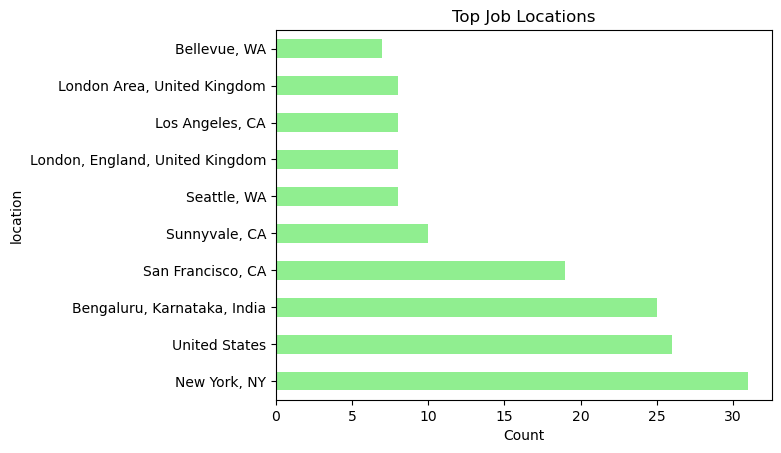

In [17]:
# Top Locations
data['location'].value_counts().head(10).plot(kind='barh', title='Top Job Locations', color='lightgreen')
plt.xlabel('Count')
plt.show()

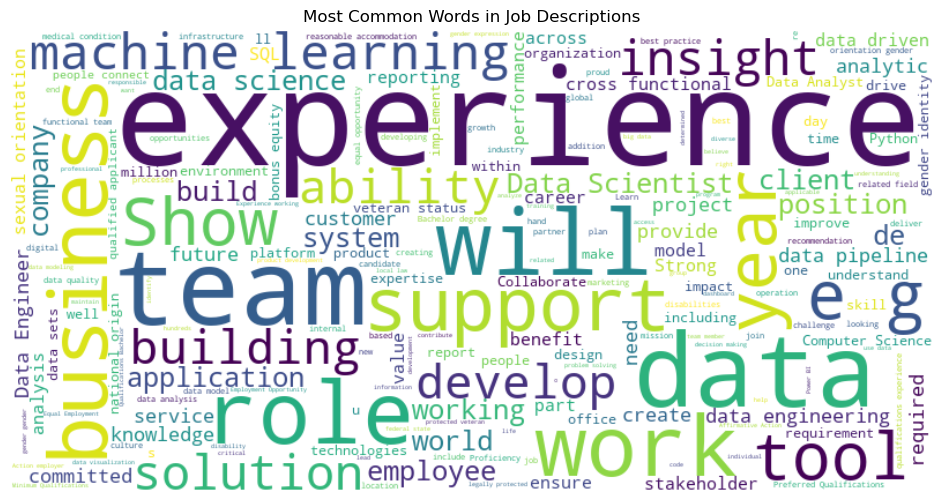

In [20]:
# Most Common Words in Job Descriptions

text = ' '.join(data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Job Descriptions')
plt.show()


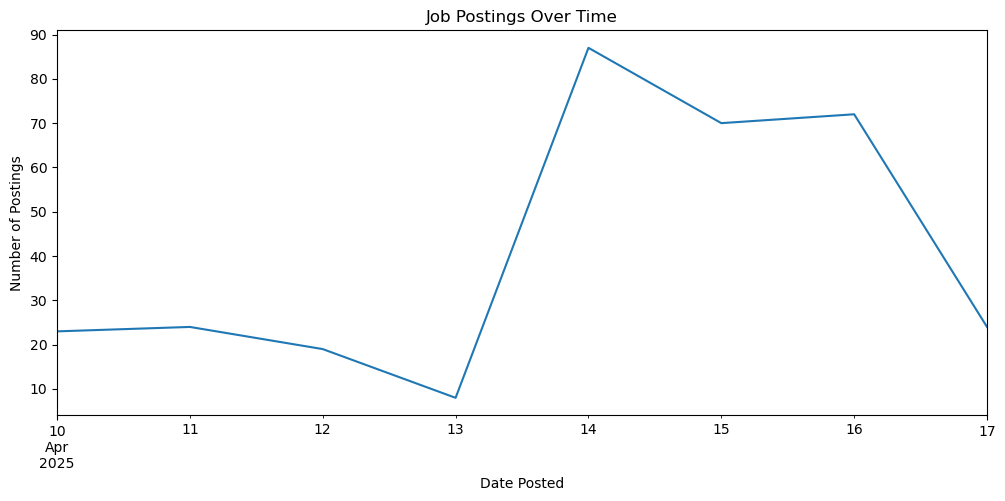

In [21]:
# Job Postings Over Time

data['date_posted'].value_counts().sort_index().plot(title='Job Postings Over Time', figsize=(12, 5))
plt.ylabel('Number of Postings')
plt.xlabel('Date Posted')
plt.show()


In [29]:
# Predicting Job Title Category

# Simplify titles
data['title_simplified'] = data['title'].apply(lambda x: x.split()[0] if isinstance(x, str) else 'Unknown')

In [31]:
# Select top 5 simplified titles for classification
top_titles = data['title_simplified'].value_counts().nlargest(5).index
data_ml = data[data['title_simplified'].isin(top_titles)]
data_ml

,id,title,company,location,link,source,date_posted,description,days_since_posted,title_simplified
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,32,Data
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,32,Data
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,32,Data
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,32,Data
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,About Pinterest\n\nMillions of people around t...,30,Data
...,...,...,...,...,...,...,...,...,...,...
322,691,Data Engineer- Python Pyspark,Virtusa,"Chennai, Tamil Nadu, India",https://in.linkedin.com/jobs/view/data-enginee...,LinkedIn,2025-04-10,Senior Data Engineer\n\nPosition Summary\n\nTh...,36,Data
323,692,Data Engineer with Pyspark,Cognizant,"Bangalore Urban, Karnataka, India",https://in.linkedin.com/jobs/view/data-enginee...,LinkedIn,2025-04-13,Job Title:- Data Engineer with Pyspark\n\nLoca...,33,Data
324,693,Data Engineer,Mercedes-Benz Malaysia,"Puchong, Selangor, Malaysia",https://my.linkedin.com/jobs/view/data-enginee...,LinkedIn,2025-04-16,"About Us\n\n\n\n\nAt Mercedes-Benz, we don’t j...",30,Data
325,740,Data Engineer I,IntePros,"Seattle, WA",https://www.linkedin.com/jobs/view/data-engine...,LinkedIn,2025-04-15,Data Engineer I – Infrastructure & Automation ...,31,Data


In [33]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data_ml['description'].fillna(''))
y = data_ml['title_simplified']

In [34]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8909090909090909

Classification Report:
               precision    recall  f1-score   support

    Analista       0.00      0.00      0.00         2
        Data       0.89      1.00      0.94        49
     Machine       0.00      0.00      0.00         3
      Senior       0.00      0.00      0.00         1

    accuracy                           0.89        55
   macro avg       0.22      0.25      0.24        55
weighted avg       0.79      0.89      0.84        55



In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)  # Set to 1 or 2
X_resampled, y_resampled = smote.fit_resample(X, y)


In [39]:
# Remove classes with fewer than 5 instances
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 5].index
X = X[np.isin(y, valid_classes)]
y = y[np.isin(y, valid_classes)]

In [40]:
y_grouped = y.apply(lambda x: x if y.value_counts()[x] >= 5 else 'Other')


In [41]:
# Re-Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [42]:
# Re-Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
# New_Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

    Analista       1.00      1.00      1.00        48
        Data       1.00      1.00      1.00        48
      Junior       1.00      1.00      1.00        48
     Machine       1.00      1.00      1.00        48
      Senior       1.00      1.00      1.00        48

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

